In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read cleaned CSVs
bollywood = pd.read_csv('cleaned_bollywood_movies.csv', index_col=0)
tollywood = pd.read_csv('cleaned_tollywood_movies.csv', index_col=0)
indian = pd.read_csv('cleaned_indian_movies.csv', index_col=0)


In [2]:
# Tag industries
bollywood['Industry'] = 'Bollywood'
tollywood['Industry'] = 'Tollywood'
indian['Industry'] = 'Other'

# Combine datasets
all_movies = pd.concat([bollywood, tollywood, indian], ignore_index=True)

# Preview
all_movies.head()


,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany,Industry
0,MOV001,Lagaan,Ashutosh Gowariker,0,2001.0,0.0,100.0,8.1,224.0,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions,Bollywood
1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001.0,50.0,100.0,7.9,210.0,Shah Rukh Khan,Kajol,Hindi,Dharma Productions,Bollywood
2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016.0,0.0,215.0,7.9,184.0,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios,Bollywood
3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017.0,250.0,1810.0,8.2,171.0,Prabhas,Anushka Shetty,Telugu,Arka Media Works,Bollywood
4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013.0,0.0,423.0,6.4,141.0,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment,Bollywood


In [3]:
# Group by Genre and calculate average BoxOffice
avg_boxoffice_all = all_movies.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)

# Preview result
avg_boxoffice_all


Genre
Epic Fantasy Action                 1230.000000
Biographical Sports Drama           1177.500000
Science Fiction Action               800.000000
Satirical Science Fiction Comedy     792.000000
Historical Romance                   565.000000
Superhero Science Fiction            530.000000
Action-Adventure                     335.000000
Historical Action                    299.333333
Comedy Drama                         250.000000
Musical Drama                        238.000000
Action Thriller                      219.083333
Satirical Comedy                     216.000000
Action Comedy                        193.000000
Action Drama                         180.000000
Romantic Comedy                      135.600000
Drama                                111.666667
0                                    100.000000
Family Drama                         100.000000
Biographical Drama                    85.000000
Historical Sports Drama               67.000000
Sports Action                     

/tmp/ipykernel_31245/1048746313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_boxoffice_all.index, y=avg_boxoffice_all.values, palette='viridis')


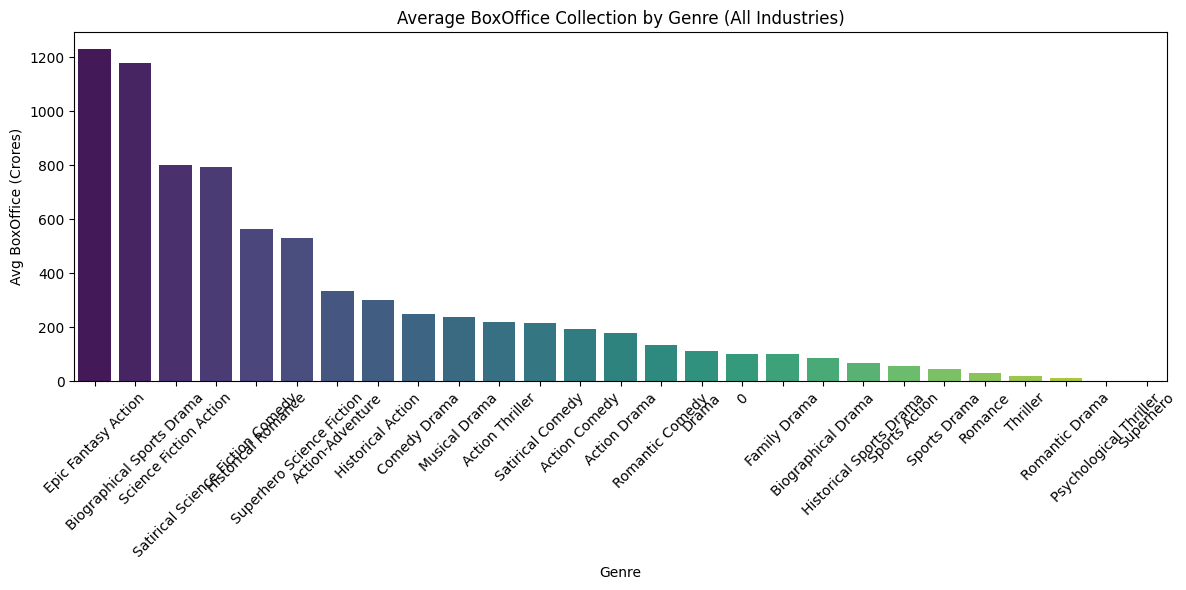

In [4]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_boxoffice_all.index, y=avg_boxoffice_all.values, palette='viridis')
plt.title('Average BoxOffice Collection by Genre (All Industries)')
plt.xticks(rotation=45)
plt.ylabel('Avg BoxOffice (Crores)')
plt.tight_layout()
plt.show()


In [5]:
# Filter for Bollywood only
bollywood_only = all_movies[all_movies['Industry'] == 'Bollywood']

# Group by Genre
avg_boxoffice_bollywood = bollywood_only.groupby('Genre')['BoxOffice (Crores)'].mean().sort_values(ascending=False)

# Preview result
avg_boxoffice_bollywood


Genre
Epic Fantasy Action                 1230.000000
Biographical Sports Drama           1177.500000
Science Fiction Action               800.000000
Satirical Science Fiction Comedy     792.000000
Historical Romance                   565.000000
Superhero Science Fiction            530.000000
Action-Adventure                     335.000000
Historical Action                    316.500000
Action Thriller                      269.875000
Comedy Drama                         250.000000
Musical Drama                        238.000000
Action Comedy                        224.500000
Satirical Comedy                     216.000000
Action Drama                         180.000000
Romantic Comedy                      166.000000
Drama                                165.000000
0                                    100.000000
Family Drama                         100.000000
Biographical Drama                    85.000000
Historical Sports Drama               67.000000
Sports Action                     

/tmp/ipykernel_31245/470947501.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_boxoffice_bollywood.index, y=avg_boxoffice_bollywood.values, palette='rocket')


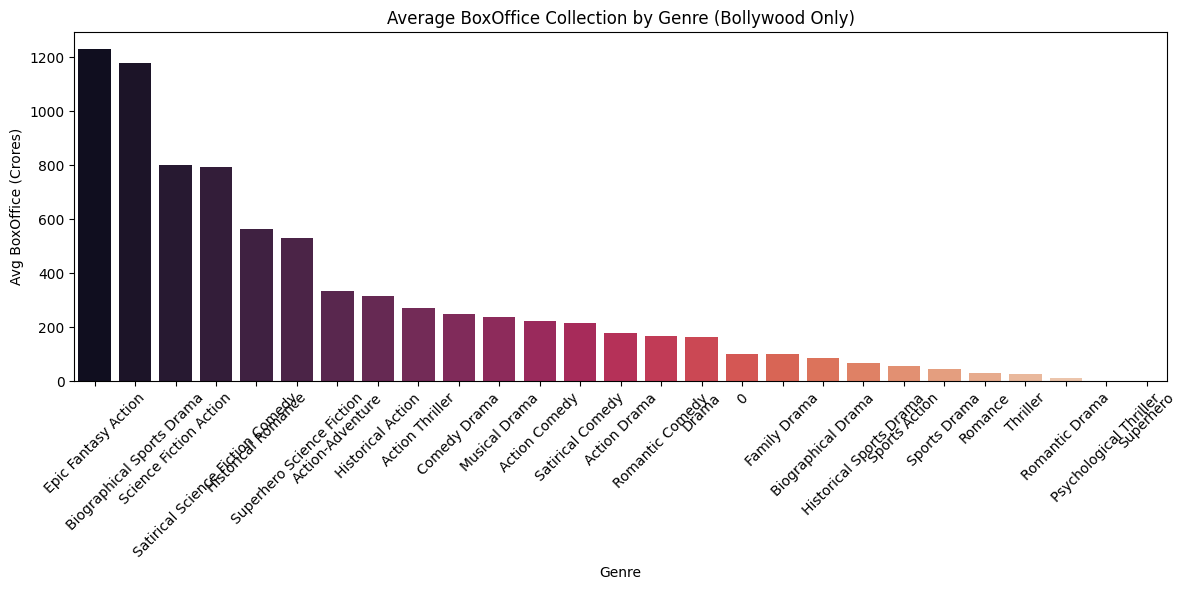

In [6]:
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_boxoffice_bollywood.index, y=avg_boxoffice_bollywood.values, palette='rocket')
plt.title('Average BoxOffice Collection by Genre (Bollywood Only)')
plt.xticks(rotation=45)
plt.ylabel('Avg BoxOffice (Crores)')
plt.tight_layout()
plt.show()
